In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df_diabetes = pd.read_csv('diabetes.csv')

In [94]:
# Checking the shape of the dataframe
df_diabetes.shape

(768, 9)

In [95]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
# Checking data types

df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [97]:
# Checking for the null values

df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [98]:
# The dataframe doesn't have any null values

In [99]:
# Exploratory Data Analysis

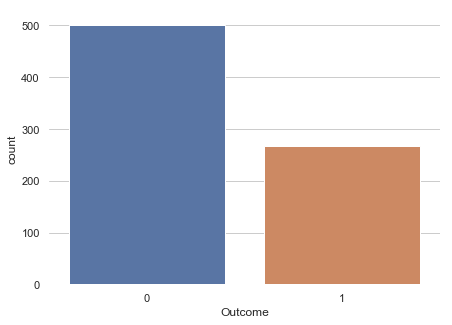

In [100]:
# Counting the number of people with and without diabetes

ax = sns.countplot(df_diabetes['Outcome'])

ax.yaxis.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

plt.show()

In [101]:
# The number of people with diabetes is about half of the number of those without.

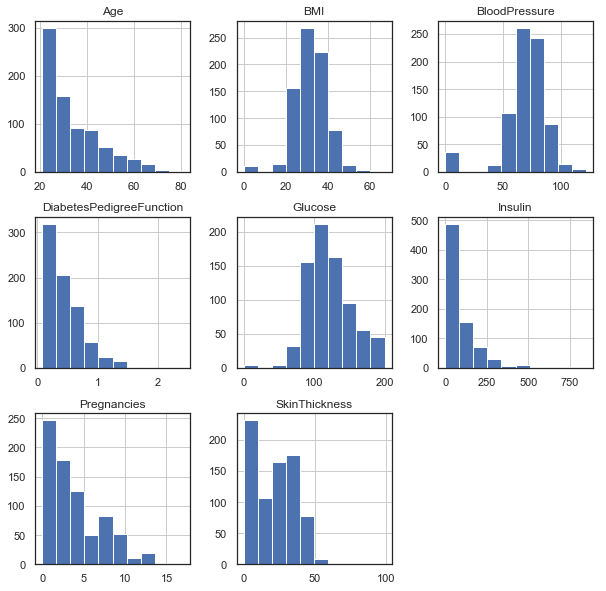

In [102]:
# Plotting the distribution of the variables

df_diabetes1 = df_diabetes.drop('Outcome', axis=1, inplace=False)

ax = df_diabetes1.hist(figsize = (10,10))
plt.show()

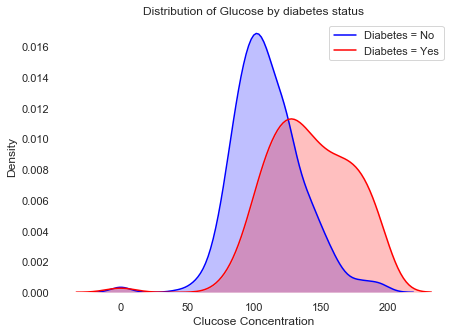

In [103]:
# We can use the KDE plot to separately visualize the distribution of features for people with and without diabetes


ax = sns.kdeplot(df_diabetes.Glucose[(df_diabetes["Outcome"] == 0) ],
                color="Blue", shade = True)
ax = sns.kdeplot(df_diabetes.Glucose[(df_diabetes["Outcome"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Diabetes = No","Diabetes = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Clucose Concentration')
ax.set_title('Distribution of Glucose by diabetes status')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)


# figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

C:\Users\nikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\nikhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


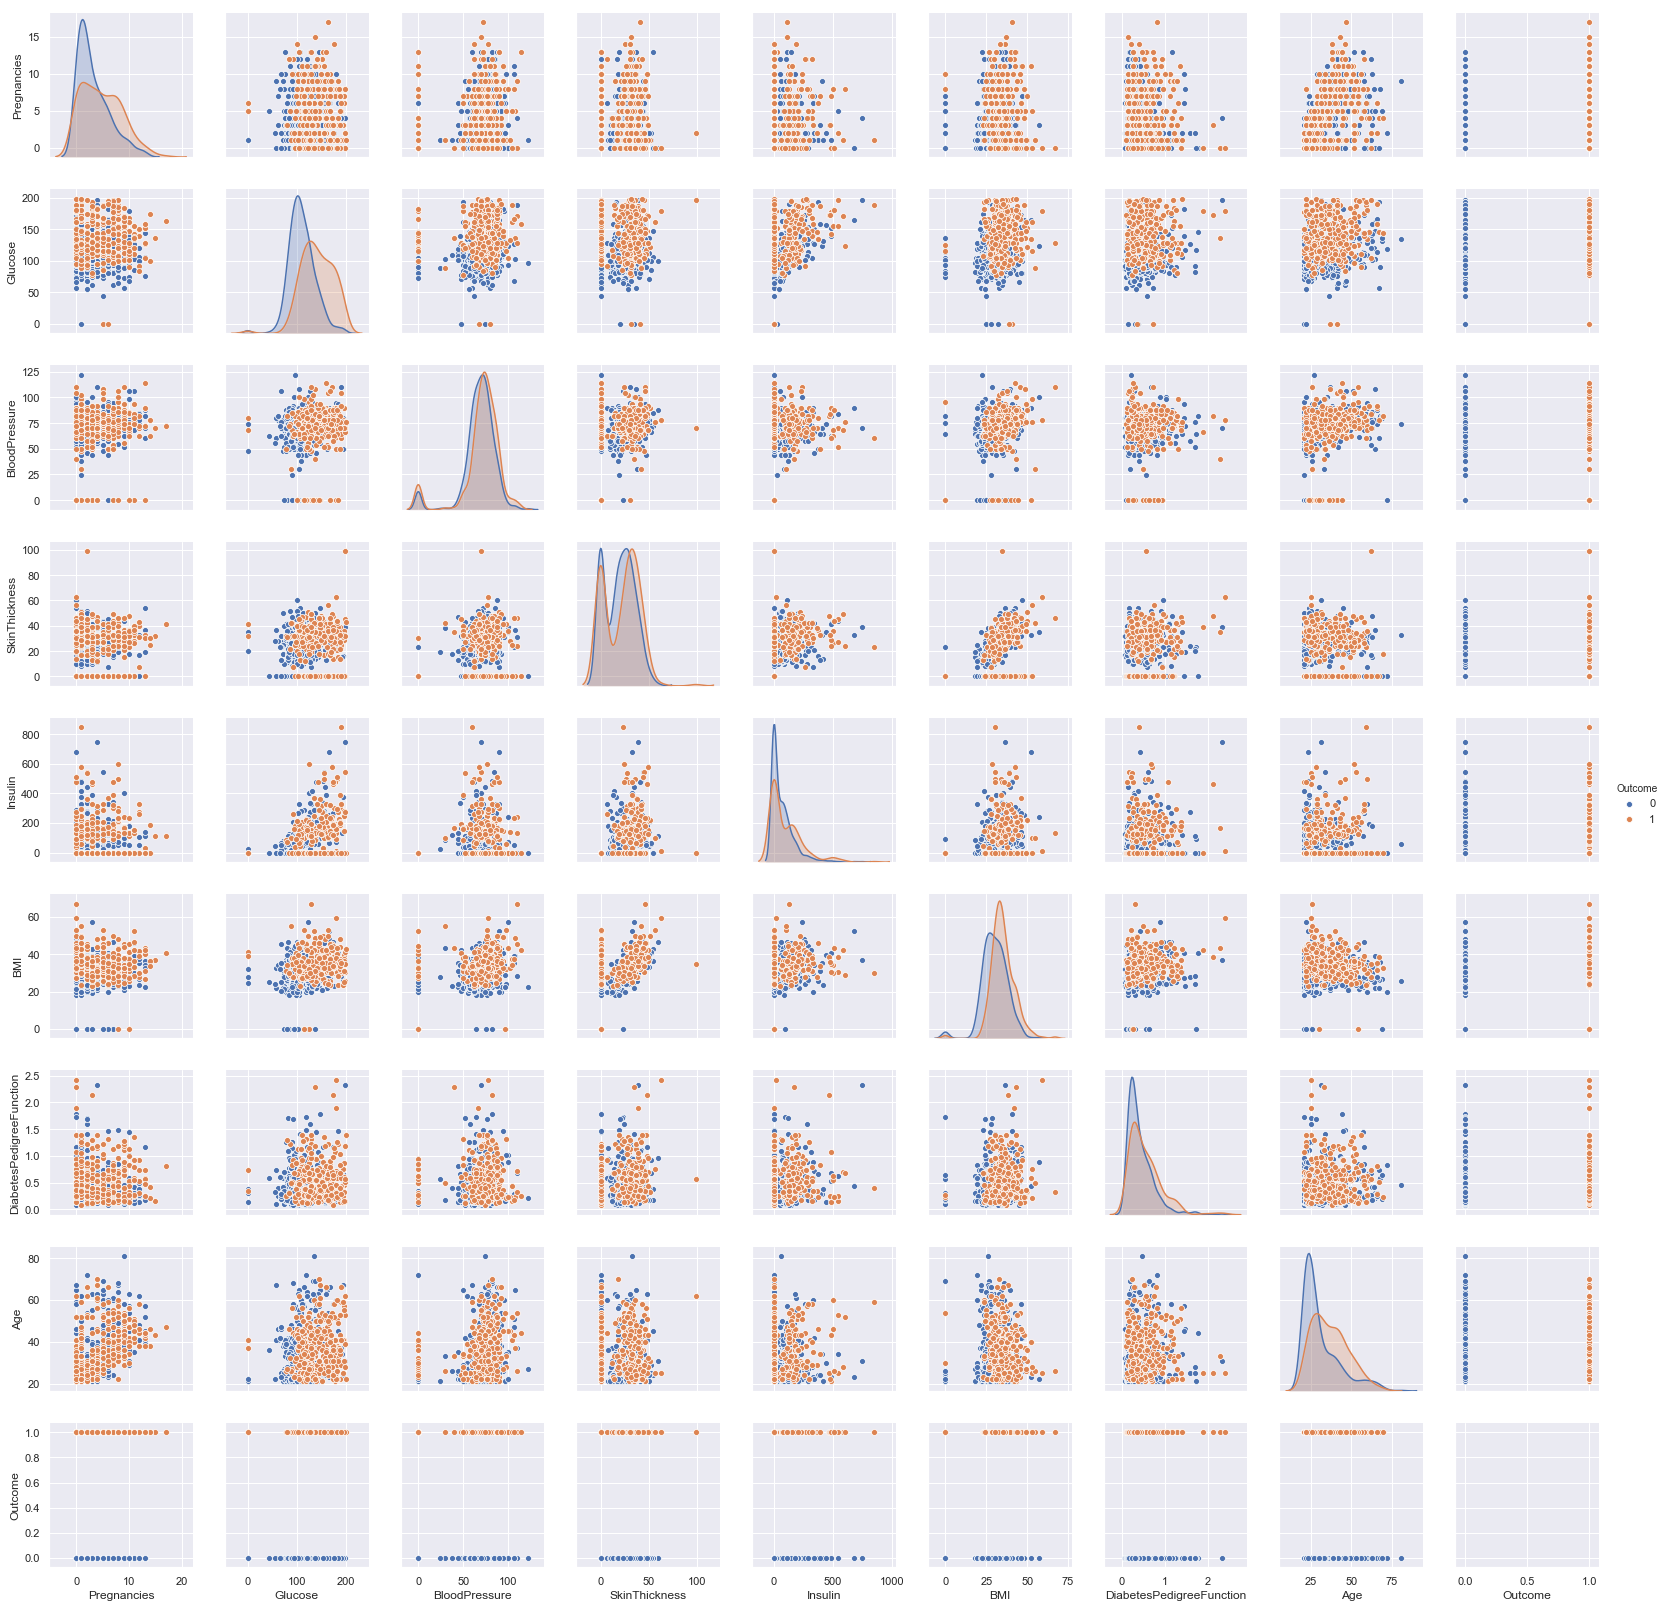

In [104]:
# Pair Plot allows us to plot the KDE - such as the one above - for all the combination of variables
# It also yields scatter plots

ax = sns.pairplot(df_diabetes, hue = 'Outcome')

In [105]:
# We can conclude that older age, high glucose concentration, and highe number pregnancies are associated with diabetes.
# However, the association doesn't seem to be strong.

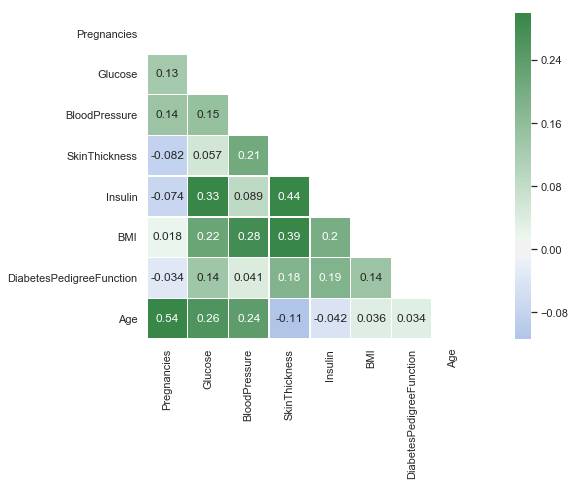

In [106]:
# Using correlation matrix to understand the correlation between variables
# We can exclude the vraibales, from the model, that have strong correlation with the other variables

df_corr = df_diabetes1.corr()

sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

plt.show()

In [107]:
# As none of the variables has a strong correlation with any other, we can't eliminate any of the variables

In [108]:
# We will scale the features using standardization

y = df_diabetes['Outcome']
X = df_diabetes.drop('Outcome', axis=1, inplace=False)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                             'Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [109]:
# Models
# A
# 1. Logistic Regression
# 2. Decision Tree
# 3. KNN
# 4. Random Forest
# 5. AdaBoosting

# B
# 1. Voting Classifier

In [110]:
# We will split the data set into train and test (30% of the original dataframe)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [111]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_logreg = logreg.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_logreg))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_logreg))

Confusion Matrix
[[141  16]
 [ 35  39]]


Accuracy
0.7792207792207793


In [113]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
y_pred_dectree = dectree.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dectree))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_dectree))

Confusion Matrix
[[125  32]
 [ 27  47]]


Accuracy
0.7445887445887446


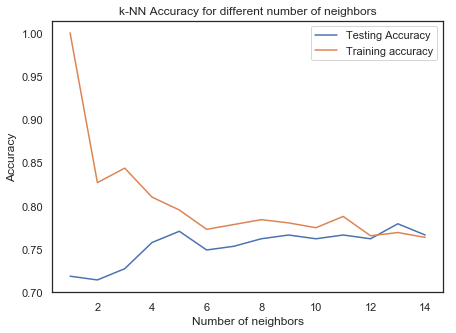

In [115]:
# KNN
# We will check the accuracy with different number of neighbors

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
    
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [116]:
# The accuracy on the test dataset is maximum with 13 neighbors

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [117]:
y_pred_knn = knn.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix
[[141  16]
 [ 35  39]]


Accuracy
0.7792207792207793


In [118]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=1000, random_state=0)
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [119]:
y_pred_ranfor = ranfor.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ranfor))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_ranfor))

Confusion Matrix
[[140  17]
 [ 34  40]]


Accuracy
0.7792207792207793


In [120]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=1000)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=None)

In [121]:
y_pred_abc = abc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_abc))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_abc))

Confusion Matrix
[[128  29]
 [ 34  40]]


Accuracy
0.7272727272727273


In [122]:
# We have already used two ensemble methods - Random Forests (Averaging) and Adaptive Boosting (Boosting) 
# To improve accuracy, we will combine different classifiers using Voting Classifier, which is also an ensemble method. 

In [123]:
# Voting Classifier without weights

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('ranfor',ranfor),('knn',knn),('abc',abc)], 
                      voting='soft')
vc.fit(X_train, y_train)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dectree',...'SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [124]:
y_pred_vc = vc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc))

Confusion Matrix
[[139  18]
 [ 27  47]]


Accuracy
0.8051948051948052


In [125]:
# The accuracy of Voting Calssifier is more than any of the other individual classsifiers

In [126]:
# Now, we will use Voting classifier with weights
# We will assign more weight to the classifiers with better accuracy

In [127]:
# Voting Classifier with weights

vc1 = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('ranfor',ranfor),('knn',knn),('abc',abc)], 
                      voting='soft', weights=[2,1,2,2,1])
vc1.fit(X_train, y_train)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dectree',...'SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 1, 2, 2, 1])

In [128]:
y_pred_vc1 = vc1.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc1))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc1))

Confusion Matrix
[[142  15]
 [ 28  46]]


Accuracy
0.8138528138528138


In [129]:
print('Model Accuracy')
print('\n')
print('Logistic Regression: '+str(round(accuracy_score(y_test, y_pred_logreg)*100,2))+'%')
print('Decision Tree: '+str(round(accuracy_score(y_test, y_pred_dectree)*100,2))+'%')
print('KNN: '+str(round(accuracy_score(y_test, y_pred_knn)*100,2))+'%')
print('\n')
print('Averaging Method')
print('Random Forest: '+str(round(accuracy_score(y_test, y_pred_ranfor)*100,2))+'%')
print('\n')
print('Boosting Method')
print('AdaBoost: '+str(round(accuracy_score(y_test, y_pred_abc)*100,2))+'%')
print('\n')
print('Voting Classifiers')
print('Voting Classifier without Weights: '+str(round(accuracy_score(y_test, y_pred_vc)*100,2))+'%')
print('Voting Classifier with Weights: '+str(round(accuracy_score(y_test, y_pred_vc1)*100,2))+'%')

Model Accuracy


Logistic Regression: 77.92%
Decision Tree: 74.46%
KNN: 77.92%


Averaging Method
Random Forest: 77.92%


Boosting Method
AdaBoost: 72.73%


Voting Classifiers
Voting Classifier without Weights: 80.52%
Voting Classifier with Weights: 81.39%


In [131]:
# We see slight improvement in the accuracy with weights assigned to the models